   # What Make Us Smile: World Happiness Data at a Glance

What is the factor that most influence the level of happiness?

  - **Hypothesis**: GDP is positively related to happiness level.
  
  - **Nullhypothesis**: GDP is not related to the happiness level.

*Bakground: The happiness score ranking use data from theGallup World Poll. The scores are based on answers to different factors including GDP, freedom,family, social support and others. There are over 150 countries in this dataset, ranging from 2015 to 2020. For our analysis, we only include 2018-2020 since these three years have similar traits.*

source: https://www.kaggle.com/mathurinache/world-happiness-report?select=2015.csv

### 1. Cleaning process

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import csv
import seaborn as sns

In [2]:
#The path to the CSV file
file_2020 = "Resources/2020.csv"

In [3]:
# Read the file
df_2020 = pd.read_csv(file_2020)

In [4]:
# visualizate the data
df_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [5]:
# Rename ladder score column 
clean_df_2020 = df_2020.rename(columns={"Ladder score":"Happiness Score", "Logged GDP per capita":"GDP per capita"})

# Drop unnecesary columns
clean_df_2020 = clean_df_2020[["Country name", "Regional indicator", "Happiness Score", "GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity"]]

In [6]:
clean_df_2020

,Country name,Regional indicator,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533
...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410
149,Rwanda,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484
150,Zimbabwe,Sub-Saharan Africa,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064
151,South Sudan,Sub-Saharan Africa,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519


In [7]:
# Narrow down the range of countries (Western Europe vs Latin America and Caribbean)

region_df_2020 = clean_df_2020.loc[(clean_df_2020["Regional indicator"]=="Western Europe")|(clean_df_2020["Regional indicator"]=="Latin America and Caribbean")|(clean_df_2020["Regional indicator"]=="Middle East and North Africa")
                |(clean_df_2020["Regional indicator"]=="Central and Eastern Europe")|(clean_df_2020["Regional indicator"]=="North America and ANZ")]

# Reset the index
region_df_2020 = region_df_2020.reset_index(drop=True)

In [8]:
# Western Europe df
we_df = region_df_2020.loc[(region_df_2020["Regional indicator"]=="Western Europe")]

In [9]:
# Latin American and Caribbean
lac_df = clean_df_2020.loc[(clean_df_2020["Regional indicator"]=="Latin America and Caribbean")]

In [10]:
# Middle East and North Africa
mena_df = region_df_2020.loc[(region_df_2020["Regional indicator"]=="Middle East and North Africa")]

In [11]:
# Central and Eastern Europe
cee_df = region_df_2020.loc[(region_df_2020["Regional indicator"]=="Central and Eastern Europe")]

In [12]:
# North America and ANZ
na_df = region_df_2020.loc[(region_df_2020["Regional indicator"]=="North America and ANZ")]

In [13]:
# Look for null values
region_df_2020.count()

Country name                    80
Regional indicator              80
Happiness Score                 80
GDP per capita                  80
Social support                  80
Healthy life expectancy         80
Freedom to make life choices    80
Generosity                      80
dtype: int64

### 2. Data visualization

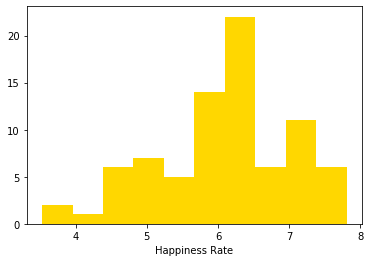

In [14]:
#Distribution of the data

happiness_rate = region_df_2020["Happiness Score"]
plt.hist(happiness_rate, color="gold")
plt.xlabel('Happiness Rate')
plt.show()

In [15]:
# Describe the data
region_df_2020.describe()

,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,6.101023,9.967232,0.866472,68.609640,0.802436,-0.040215
std,0.942664,0.801378,0.077730,3.900124,0.116720,0.145376
min,3.527400,7.411329,0.592628,55.598625,0.466611,-0.300907
25%,5.543450,9.456189,0.824956,66.791725,0.743382,-0.158610
50%,6.174850,10.118502,0.885515,68.399750,0.835462,-0.077146
75%,6.808975,10.588201,0.922573,72.300821,0.887424,0.085814
max,7.808700,11.450681,0.974670,74.402710,0.955750,0.400535


In [16]:
# Western Europe
we_df.describe()

,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,6.899219,10.688402,0.913134,72.863565,0.854993,0.038923
std,0.683212,0.306327,0.047160,0.746943,0.105049,0.148602
min,5.515000,10.132326,0.805996,71.900825,0.541345,-0.300907
25%,6.400900,10.481836,0.898874,72.300919,0.813582,-0.050962
50%,7.093700,10.673639,0.928046,72.599998,0.888748,0.066202
75%,7.448900,10.774001,0.942082,73.601685,0.924911,0.134533
max,7.808700,11.450681,0.974670,74.402710,0.955750,0.263732


In [17]:
# Latin American and Caribbean
lac_df.describe()

,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,5.981786,9.303024,0.856891,66.717328,0.830684,-0.071901
std,0.660213,0.670937,0.071688,3.227917,0.092859,0.130883
min,3.720800,7.411329,0.593248,55.598625,0.537825,-0.194914
25%,5.796800,8.924806,0.831075,65.807487,0.831132,-0.153928
50%,6.137100,9.456313,0.882085,67.198769,0.858709,-0.102430
75%,6.348300,9.797797,0.900568,68.500038,0.875873,-0.042939
max,7.121400,10.260002,0.922811,71.299850,0.934739,0.400535


In [18]:
# Middle East and North Africa
mena_df.describe()

,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,5.227159,9.713648,0.796720,65.313611,0.710171,-0.084426
std,0.988163,0.926929,0.080980,3.742944,0.133281,0.126384
min,3.527400,7.759683,0.592628,56.727283,0.466611,-0.240377
25%,4.633400,9.314973,0.747695,62.299999,0.608830,-0.168695
50%,5.005100,9.661096,0.824338,66.305145,0.708354,-0.121105
75%,6.102100,10.417525,0.846475,66.902817,0.773157,-0.061215
max,7.128600,11.109999,0.913571,73.200256,0.941346,0.133729


In [19]:
# Central and Eastern Europe
cee_df.describe()

,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,5.883818,9.975703,0.874566,68.148988,0.770271,-0.102712
std,0.523486,0.397603,0.068332,1.646989,0.083754,0.113807
min,4.882700,9.204430,0.671070,63.885555,0.649566,-0.230862
25%,5.546100,9.680981,0.829204,67.294075,0.718965,-0.194323
50%,6.000400,10.107584,0.881476,68.210205,0.747381,-0.124409
75%,6.215500,10.340017,0.922494,68.906342,0.842823,-0.073676
max,6.910900,10.404163,0.939576,71.102989,0.936143,0.190934


In [20]:
# North America and ANZ
na_df.describe()

,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,7.173525,10.709919,0.933842,72.177067,0.907045,0.164180
std,0.159661,0.173862,0.016167,2.591928,0.043947,0.032658
min,6.939600,10.500943,0.914219,68.299500,0.842620,0.124771
25%,7.152000,10.644512,0.923937,71.976847,0.897229,0.143611
50%,7.227450,10.706482,0.936016,73.402115,0.924672,0.170176
75%,7.248975,10.771889,0.945921,73.602335,0.934489,0.190745
max,7.299600,10.925769,0.949119,73.604538,0.936217,0.191598


### 1. Do the countries of the same region have the same level of happiness?

Using bar graphs for each region, we were able to compare the happiness scores for each country. Based on the data that we found, happiness level varies between countries within regions. We did however find that some regions have larger variations between countries than others; Latin America and Caribbean as well as Central and Eastern Europe have multiple countries with similar happiness levels. By contrast, Western Europe as well as Middle East and North Africa each either have very few countries with similar levels of happiness.

In [21]:
# Create the variables for the plot

# WE Region
rate_we = we_df["Happiness Score"].values
country_name_we = we_df["Country name"].values
# LAC Region
rate_lac = lac_df["Happiness Score"].values
country_name_lac = lac_df["Country name"].values
# MENA Region
rate_mena = mena_df["Happiness Score"].values
country_name_mena = mena_df["Country name"].values
# CEE Region
rate_cee = cee_df["Happiness Score"].values
country_name_cee = cee_df["Country name"].values
# NA REGION
rate_na = na_df["Happiness Score"].values
country_name_na = na_df["Country name"].values

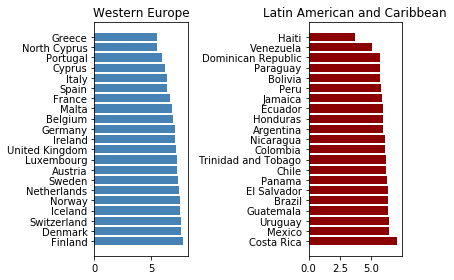

In [22]:
# Western Europe vs Latin American and Caribbean
plt.subplot(1, 2, 1)
happiness_we = plt.barh(country_name_we,rate_we ,color="steelblue", linewidth=1)
plt.title("Western Europe")
plt.subplot(1, 2, 2)
happiness_lac = plt.barh(country_name_lac,rate_lac ,color="darkred", linewidth=1)
plt.title("Latin American and Caribbean")
plt.tight_layout()
plt.savefig("Images/we_vs_lac.png")

The happiness score is different among the countries in each region.

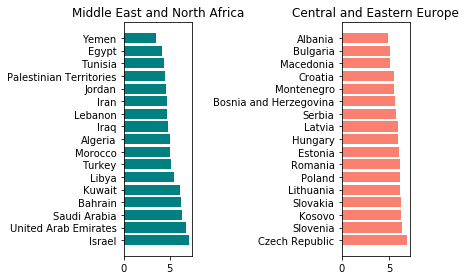

In [23]:
# Middle East and North Africa vs Central and Eastern Europe
plt.subplot(1, 2, 1)
happiness_mena = plt.barh(country_name_mena,rate_mena ,color="teal", linewidth=1)
plt.title("Middle East and North Africa")
plt.subplot(1, 2, 2)
happiness_cee = plt.barh(country_name_cee,rate_cee ,color="salmon", linewidth=1)
plt.title("Central and Eastern Europe")
plt.tight_layout()
plt.savefig("Images/mena_vs_cee.png")

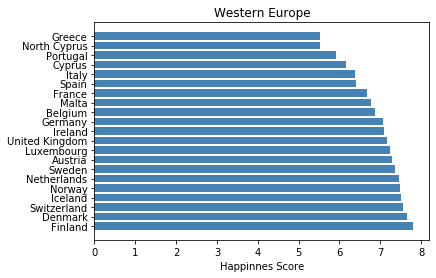

In [24]:
# Western Europe
happiness_we = plt.barh(country_name_we,rate_we ,color="steelblue", linewidth=5)
plt.title("Western Europe")
plt.xlabel("Happinnes Score")
plt.savefig("Images/we_happinnes_score.png")

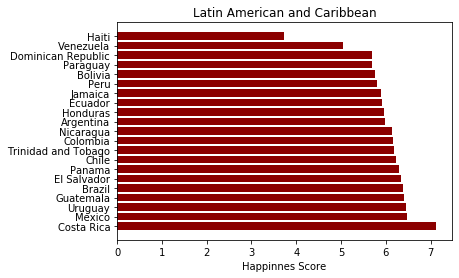

In [25]:
# Latin American and Caribbean
happiness_lac = plt.barh(country_name_lac,rate_lac ,color="darkred", linewidth=1)
plt.title("Latin American and Caribbean")
plt.xlabel("Happinnes Score")
plt.savefig("Images/lac_happinnes_score.png")

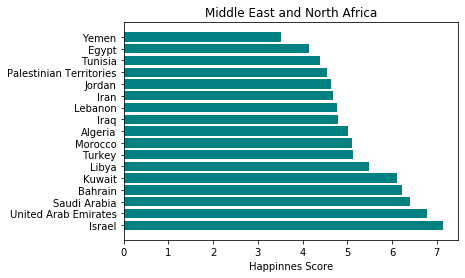

In [26]:
# Middle East and North Africa
happiness_mena = plt.barh(country_name_mena,rate_mena ,color="teal", linewidth=1)
plt.title("Middle East and North Africa")
plt.xlabel("Happinnes Score")
plt.savefig("Images/mena_happinnes_score.png")

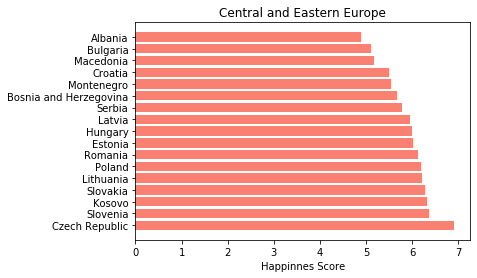

In [27]:
# Central and Eastern Europe
happiness_cee = plt.barh(country_name_cee,rate_cee ,color="salmon", linewidth=1)
plt.title("Central and Eastern Europe")
plt.xlabel("Happinnes Score")
plt.savefig("Images/cee_happinnes_score.png")

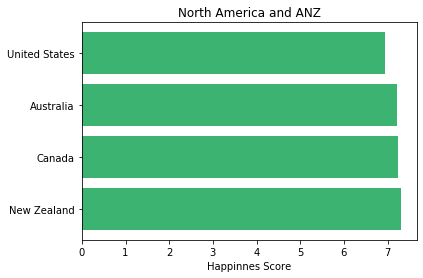

In [28]:
# North America and ANZ
happiness_na = plt.barh(country_name_na,rate_na ,color="mediumseagreen", linewidth=1)
plt.title("North America and ANZ")
plt.xlabel("Happinnes Score")
plt.savefig("Images/na_happinnes_score.png")

### 2. Do all of the variables have an equal effect on the happiness level of regions?

We used heat maps to show the correlation between the variables (GDP, social support, health life expectancy, freedom to make choices, and generosity) and the overall happiness level. The first heat map, which encompassed every region together, showed a positive and overall similar correlation between happiness level and four of the variables. Generosity however showed a very weak correlation to happiness level.


Breaking down region by region shows interesting variances. In two of our regions (Latin America and Caribbean as well as Central and Eastern Europe) we found a negative correlation between generosity and happiness level. We also found that these two regions had the lowest GDP correlations out of the regions we measured. We also noticed that North America and ANZ had a strong negative correlation between happiness level and GDP.

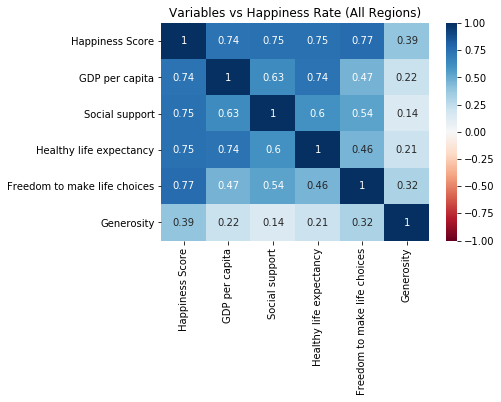

In [29]:
# All regions
corr_world =region_df_2020.corr(method="pearson", min_periods=80)
sns.heatmap(corr_world, annot=True, cmap ='RdBu', vmin=-1, vmax=1)
plt.title("Variables vs Happiness Rate (All Regions)")
plt.savefig("Images/correlation_all_regions.png")

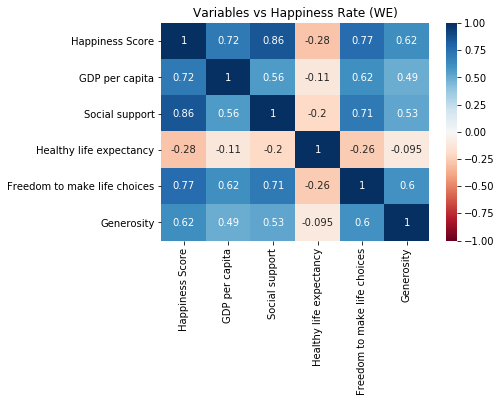

In [30]:
# Correlation for Western Europe
corr_we = we_df.corr()
sns.heatmap(corr_we, annot=True, cmap ='RdBu', vmin=-1, vmax=1)
plt.title("Variables vs Happiness Rate (WE)")
plt.savefig("Images/correlation_we.png")

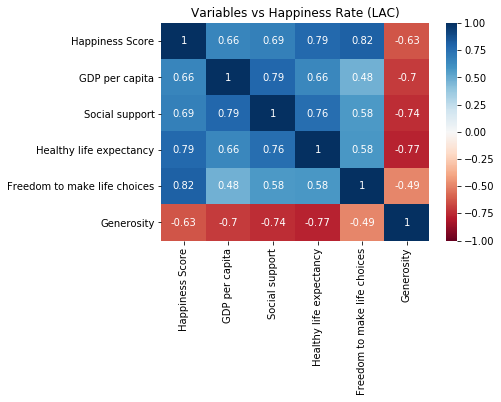

In [31]:
# Correlation for Latin American and Caribbean data frame
corr_lac =lac_df.corr(method="pearson", min_periods=21)
sns.heatmap(lac_df.corr(), annot=True, cmap ='RdBu', vmin=-1, vmax=1)
plt.title("Variables vs Happiness Rate (LAC)")
plt.savefig("Images/correlation_lac.png");

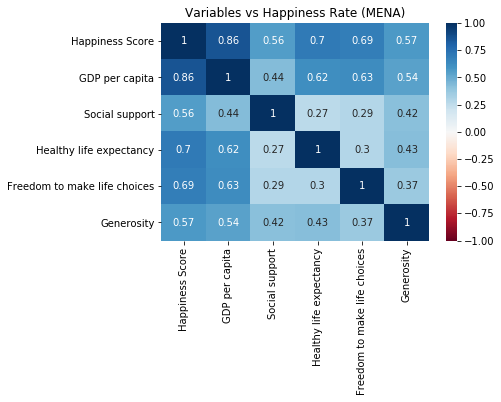

In [32]:
# Correlation for Middle East and North Africa
corr_mena =mena_df.corr(method="pearson", min_periods=17)
sns.heatmap(corr_mena, annot=True, cmap ='RdBu', vmin=-1, vmax=1)
plt.title("Variables vs Happiness Rate (MENA)")
plt.savefig("Images/correlation_mena.png");

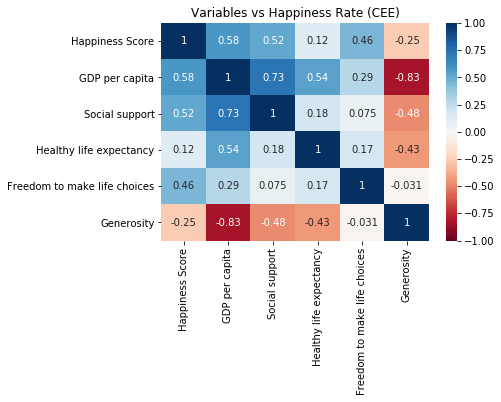

In [34]:
# Correlation for Central and Eastern Europe
corr_cee =cee_df.corr(method="pearson", min_periods=17)
sns.heatmap(corr_cee, annot=True, cmap ='RdBu', vmin=-1, vmax=1)
plt.title("Variables vs Happiness Rate (CEE)")
plt.savefig("Images/correlation_cee.png");

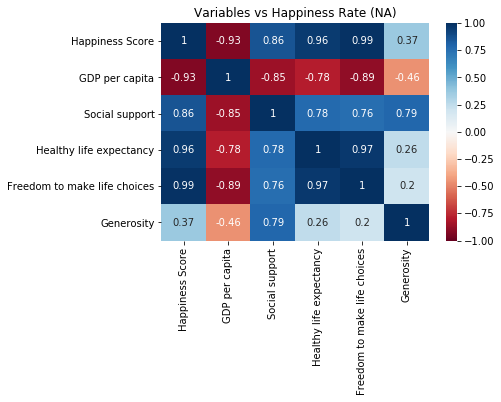

In [35]:
# Correlation for North America and ANZ
corr_na =na_df.corr(method="pearson", min_periods=4)
sns.heatmap(corr_na, annot=True, cmap ='RdBu', vmin=-1, vmax=1)
plt.title("Variables vs Happiness Rate (NA)")
plt.savefig("Images/correlation_na.png");

### 3. How do the countries with the highest GDP compare in terms of happiness level versus the countries with the lowest GDP?

We used a box plot to compare the happiness level of higher-GDP countries to the happiness level of lower-GDP countries. We found that countries with the highest GDP levels have a significantly higher level of happiness than countries with the lowest GDP levels. The difference was so significant that approximately 75% of countries with the lowest GDPs had happiness levels lower than what would be considered an outlier on the low side of the highest-GDP countries.

In [36]:
# Select ten countries with the highest GDP in all regions 
highest_gdp = region_df_2020.sort_values("GDP per capita", ascending=False)
highest_gdp = highest_gdp.head(10)
highest_gdp

,Country name,Regional indicator,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
9,Luxembourg,Western Europe,7.2375,11.450681,0.906912,72.599998,0.905636,-0.004621
15,Ireland,Western Europe,7.0937,11.160978,0.942082,72.300789,0.886983,0.145785
20,United Arab Emirates,Middle East and North Africa,6.7908,11.109999,0.849181,67.082787,0.941346,0.123451
44,Kuwait,Middle East and North Africa,6.1021,11.089825,0.846475,66.767647,0.872366,-0.100185
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911
17,United States,North America and ANZ,6.9396,10.925769,0.914219,68.299500,0.842620,0.149892
5,Netherlands,Western Europe,7.4489,10.812712,0.939139,72.300919,0.908548,0.207612
25,Saudi Arabia,Middle East and North Africa,6.4065,10.797812,0.874067,66.305145,0.854191,-0.168695
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202


In [37]:
# Select ten countries with the lowest GDP in all regions 
lowest_gdp = region_df_2020.sort_values("GDP per capita")
lowest_gdp = lowest_gdp.head(10)
lowest_gdp

,Country name,Regional indicator,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
78,Haiti,Latin America and Caribbean,3.7208,7.411329,0.593248,55.598625,0.537825,0.400535
79,Yemen,Middle East and North Africa,3.5274,7.759683,0.817981,56.727283,0.599920,-0.157735
75,Palestinian Territories,Middle East and North Africa,4.5528,8.389223,0.825296,62.250000,0.645792,-0.162079
48,Honduras,Latin America and Caribbean,5.9532,8.424535,0.821870,67.198769,0.870603,0.086969
42,Nicaragua,Latin America and Caribbean,6.1371,8.493160,0.857497,67.507179,0.863903,0.020959
55,Bolivia,Latin America and Caribbean,5.7475,8.851115,0.803109,63.600471,0.875873,-0.091681
31,El Salvador,Latin America and Caribbean,6.3483,8.909076,0.806092,66.108261,0.833805,-0.121073
27,Guatemala,Latin America and Caribbean,6.3989,8.924806,0.816621,64.808945,0.908148,-0.042939
67,Morocco,Middle East and North Africa,5.0948,8.940313,0.592628,65.896240,0.772072,-0.240377
68,Venezuela,Latin America and Caribbean,5.0532,8.977794,0.890408,66.505341,0.623278,-0.169091


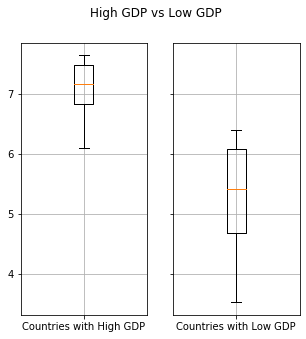

In [38]:
# Plot the results in the same chart
f,ax = plt.subplots(1, 2, sharey=True, figsize=(5, 5))
ax[0].boxplot(highest_gdp["Happiness Score"], labels=["Countries with High GDP"])
ax[1].boxplot(lowest_gdp["Happiness Score"], labels=["Countries with Low GDP"])
ax[0].grid()
ax[1].grid()
f.suptitle("High GDP vs Low GDP")
plt.savefig("Images/high_gdp_low_gdp.png");

### 4. What portion of high-GDP countries have low happiness levels?

We used a pie chart to visualize the percentage of high-GDP countries with low happiness levels. We found that out of all of the countries listed, only 10% of them had both high-GDP and low happiness. Out of the high-GDP countries, only 18% had low happiness levels. Only eight countries with high GDP are considered low-happiness countries.


Note: 
- Countries with a GDP under the average, will be considered low-GDP countries. 
- Countries with a happiness score under the average, will be considered low-happiness countries. 

In [39]:
# Stablish a dinamic mean for GPD
mean_gdp = region_df_2020['GDP per capita'].mean()

In [40]:
# Stablish a dinamic mean for happiness rate
mean_happiness = region_df_2020['Happiness Score'].mean()

In [41]:
# Filter the countries which have a high GPD but low Happiness Score
question_4 = region_df_2020.loc[(region_df_2020['GDP per capita']>=mean_gdp) & (region_df_2020['Happiness Score']<mean_happiness)]
question_4

,Country name,Regional indicator,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
45,Estonia,Central and Eastern Europe,6.0218,10.340017,0.934730,68.604958,0.877709,-0.111698
46,Hungary,Central and Eastern Europe,6.0004,10.249244,0.921934,67.609970,0.718965,-0.194323
49,Latvia,Central and Eastern Europe,5.9500,10.175320,0.918289,66.807465,0.671238,-0.186889
51,Portugal,Western Europe,5.9109,10.263742,0.886591,72.402023,0.888748,-0.220714
60,North Cyprus,Western Europe,5.5355,10.405703,0.820357,73.702225,0.795294,0.000227
61,Greece,Western Europe,5.5150,10.132326,0.814380,72.405258,0.541345,-0.300907
62,Croatia,Central and Eastern Europe,5.5047,10.070875,0.874624,70.214905,0.714839,-0.128538
65,Turkey,Middle East and North Africa,5.1318,10.129419,0.826314,66.902817,0.608830,-0.171046


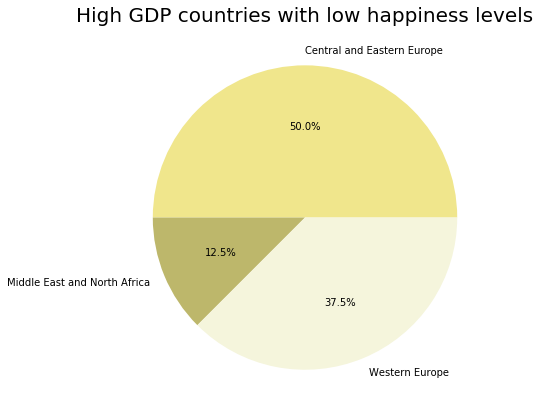

In [42]:
# High GDP countries with low happiness levels

ru_region_group = question_4.groupby("Regional indicator")
ru_region_distribution = ru_region_group["Regional indicator"].count()
colors=('khaki', 'darkkhaki', 'beige')
reach_unhappy_countries_pie = ru_region_distribution.plot(kind="pie",autopct='%1.1f%%', colors=colors, figsize=(7, 7))
reach_unhappy_countries_pie.set_title('High GDP countries with low happiness levels', fontsize=20)
reach_unhappy_countries_pie.set_ylabel("")
plt.savefig("Images/question_4.png");

In [43]:
# Calculate the % of High GDP countries with low happiness levels

proportion_ru_countries = (question_4["Country name"].count() / region_df_2020["Country name"].count() ) * 100
print(f"{proportion_ru_countries}% of the total countries have high GDP have low happiness levels")

10.0% of the total countries have high GDP have low happiness levels


In [44]:
# Countries with high GDP
question_4_rc = region_df_2020.loc[(region_df_2020['GDP per capita']>=mean_gdp)]

In [45]:
# What percentage of the total high-GDP countries have low happiness levels?
proportion_countries_rc = round(((question_4["Country name"].count() / question_4_rc["Country name"].count() ) * 100),2)
print(f"{proportion_countries_rc}% of the countries with high GDP have low happiness levels")


18.18% of the countries with high GDP have low happiness levels


### 5.  What portion of low-GDP countries have high happiness levels?

We decided to use a pie chart to visualize the percentage of low-GDP countries with high happiness levels. We found that 25% of the total countries with low GDP have high happiness levels. We also found that out of all countries listed, only 11% fit the criteria of being low-GDP countries with high happiness levels.

In [46]:
# Filter the countries which have a low GPD but high Happiness Score

question_5 = region_df_2020.loc[(region_df_2020['GDP per capita']<mean_gdp) & (region_df_2020['Happiness Score']>=mean_happiness)]
question_5

,Country name,Regional indicator,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
14,Costa Rica,Latin America and Caribbean,7.1214,9.658156,0.901546,71.299850,0.934739,-0.102430
23,Mexico,Latin America and Caribbean,6.4650,9.797797,0.838665,68.299026,0.858709,-0.175267
24,Uruguay,Latin America and Caribbean,6.4401,9.948193,0.922811,69.002548,0.892395,-0.101103
27,Guatemala,Latin America and Caribbean,6.3989,8.924806,0.816621,64.808945,0.908148,-0.042939
29,Brazil,Latin America and Caribbean,6.3756,9.566435,0.896724,66.480164,0.799805,-0.101812
31,El Salvador,Latin America and Caribbean,6.3483,8.909076,0.806092,66.108261,0.833805,-0.121073
32,Kosovo,Central and Eastern Europe,6.3252,9.204430,0.820727,63.885555,0.861536,0.190934
40,Colombia,Latin America and Caribbean,6.1634,9.500369,0.884440,67.699585,0.836180,-0.161236
42,Nicaragua,Latin America and Caribbean,6.1371,8.493160,0.857497,67.507179,0.863903,0.020959


In [47]:
# Countries with low GDP
question_5_pc = region_df_2020.loc[(region_df_2020['GDP per capita']<mean_gdp)]

In [48]:
# What percentage of the total low-GDP countries have high happiness levels?
proportion_countries_pc = (question_5["Country name"].count() / question_5_pc["Country name"].count() ) * 100
print(f"{proportion_countries_pc}% of the total countries with low GDP have high happiness levels")

25.0% of the total countries with low GDP have high happiness levels


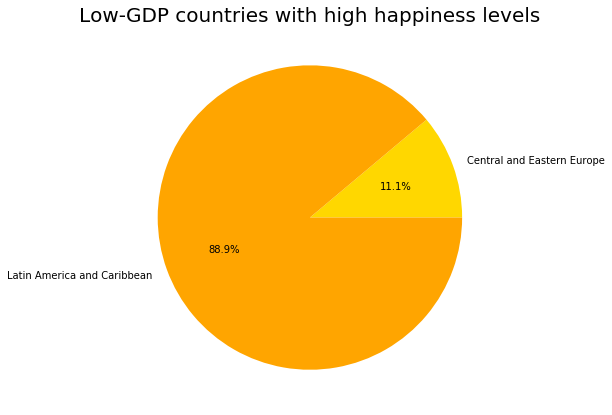

In [52]:
# Low-GDP countries with high happiness levels
ph_region_group = question_5.groupby("Regional indicator")
ph_region_distribution = ph_region_group["Regional indicator"].count()
colors=('gold', 'orange')
poor_happy_countries_pie = ph_region_distribution.plot(kind="pie", autopct='%1.1f%%', colors=colors, figsize=(7, 7))
poor_happy_countries_pie.set_title('Low-GDP countries with high happiness levels', fontsize=20)
poor_happy_countries_pie.set_ylabel("")
plt.savefig("Images/question_5.png");

In [53]:
# Calculate the % of Low-GDP countries with have high happiness levels
proportion_ph_countries = (question_5["Country name"].count() / region_df_2020["Country name"].count() ) * 100
print(f"{proportion_ph_countries}% of low-GDP countries have high happiness levels.")

11.25% of low-GDP countries have high happiness levels.


### GDP Per Capita

To understand the differences in GDP for different regions, we started by doing two independent t-test. 

Our first t-test is between Western Europe versus Latin America and Caribbean. According to our results, the 21 countries in Western Europe (M =10.688, SD =0.306) compared to 21 countries in Latin America and Caribbean (M = 9.303, SD = 0.671) demonstrated significantly higher Happiness scores, t(40) = 8.607, p  <0.001).

Our other t-test is between Middle East and North Africa versus Central and Eastern Europe. According to the data, the 17 countries in Middle East and North Africa (M = 9.714, SD =0.927) are not demonstrating significantly different happiness scores, t(40) = 1.0712, p = 0.292 when compared to the 17 countries in Central and Eastern Europe (M = 9.998, SD = 0.397).

A one-way ANOVA was conducted to compare GDP Per Capita in Western Europe, Latin America and Caribbean, Middle East and North Africa, Central and Eastern Europe, and North America and ANZ. We found a significant difference in mean GDP (F(4,86)=15.763, p < 0.001) between the regions.

#### **Independent T-test**

In [54]:
#Independent t-test - GPD (WE vs LAC)
g1 = region_df_2020[region_df_2020['Regional indicator'] == 'Western Europe']["GDP per capita"]
g2 = region_df_2020[region_df_2020['Regional indicator'] == 'Latin America and Caribbean']["GDP per capita"]
stats.ttest_ind(g1,g2)

Ttest_indResult(statistic=8.607583083234514, pvalue=1.2098422060648664e-10)

In [55]:
#Independent t-test - GPD (CEE vs MENA)
g3 = region_df_2020[region_df_2020['Regional indicator'] == 'Central and Eastern Europe']["GDP per capita"]
g4 = region_df_2020[region_df_2020['Regional indicator'] == 'Middle East and North Africa']["GDP per capita"]
stats.ttest_ind(g3,g4)

Ttest_indResult(statistic=1.0712632140461713, pvalue=0.2920645407772715)

### ANOVA

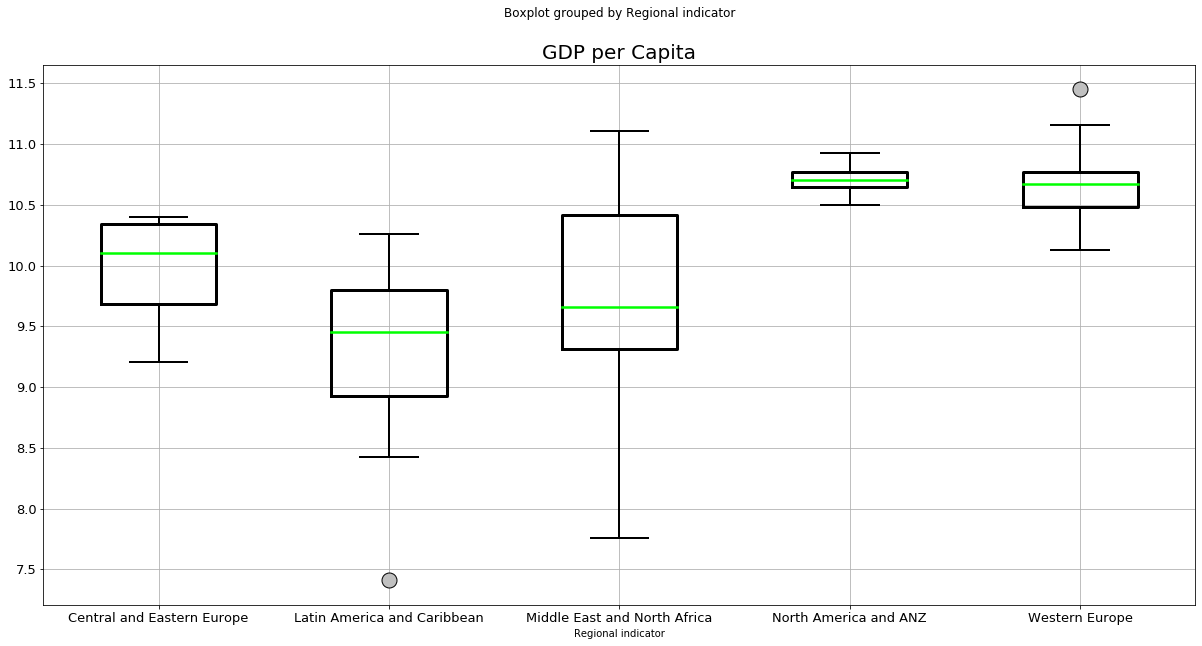

In [56]:
# Create a boxplot to compare means - GDP 
boxprops = dict(linestyle='-', linewidth=3)
flierprops = dict(marker='o', markerfacecolor='silver', markersize=15,
                  linestyle='none')
medianprops = dict(linestyle='-', linewidth=2.5)
whiskerprops=dict(linestyle='-', linewidth=2)
capprops=dict(linestyle='-', linewidth=2)
color=dict(boxes='black', whiskers='black', medians='lime', caps='black')
region_GDP = region_df_2020.boxplot("GDP per capita", by="Regional indicator", figsize=(20, 10), fontsize=13,
                                             boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, whiskerprops=whiskerprops,
                                            capprops=capprops, color=color)
region_GDP.set_title('GDP per Capita', fontsize=20)
plt.savefig("Images/gdp_by_region.png");

In [57]:
# Extract individual groups - Happiness Score
group1 = region_df_2020[region_df_2020['Regional indicator'] == 'Western Europe']["Happiness Score"]
group2 = region_df_2020[region_df_2020['Regional indicator'] == 'Latin America and Caribbean']["Happiness Score"]
group3 = region_df_2020[region_df_2020['Regional indicator'] == 'Central and Eastern Europe']["Happiness Score"]
group4 = region_df_2020[region_df_2020['Regional indicator'] == 'Middle East and North Africa']["Happiness Score"]
group5 = region_df_2020[region_df_2020['Regional indicator'] == 'North America and ANZ']["Happiness Score"]

In [58]:
# ANOVA
stats.f_oneway(group1, group2, group3,group4,group5)

F_onewayResult(statistic=15.763410271316431, pvalue=2.095752329095272e-09)

### Happiness Score

Similarly, to understand the differences in happiness score for different regions, we first conducted two independent t-tests. 

The first t-test is between Western Europe versus Latin America and Caribbean. According to our results, the 21 countries in Western Europe (M =6.899, SD =0.683) demonstrated significantly higher happiness scores, t(40)= 4.425, p = 0.0000724 (<0.05) when compared to 21 countries in Latin America and Caribbean (M = 5.982, SD = 0.660).

Our other t-test is between Middle East and North Africa versus Central and Eastern Europe. According to the output, the 17 countries in Middle East and North Africa (M = 5.227, SD =0.988) demonstrated significantly lower happiness scores, t(40) = 2.421, p = .0213 (<0.05) when compared to 17 countries in Central and Eastern Europe (M = 5.884, SD = 0.523).

Our t-tests gave us some insights in the systematic difference in two groups; it is beneficial to further compare if significant differences in happiness score exists in all five regions. A one-way ANOVA was conducted to compare happiness scores in Western Europe, Latin America and Caribbean, Middle East and North Africa, Central and Eastern Europe, and finally North America and ANZ. We found a significant difference in mean happiness scores based on region memberships, F(4,86) = 15.7634, p value=0.000000002095 (<.05). While ANOVA tests answer whether all group means are the same, we conducted a post hoc test to find out where the differences are. We used 
t-tests with an adjustment to account for testing multiple times, which is available in the package “scikit_posthocs”. As shown in the table of p values below, there are group differences where the p value is less than 0.05. 

### **Independent T-test**

In [60]:
#Independent t-test - Happiness (WE vs LAC)
g1 = region_df_2020[region_df_2020['Regional indicator'] == 'Western Europe']["Happiness Score"]
g2 = region_df_2020[region_df_2020['Regional indicator'] == 'Latin America and Caribbean']["Happiness Score"]
stats.ttest_ind(g1,g2)

Ttest_indResult(statistic=4.4250908280324674, pvalue=7.23946909272924e-05)

In [61]:
#Independent t-test - Happiness (CEE vs MENA)
g3 = region_df_2020[region_df_2020['Regional indicator'] == 'Central and Eastern Europe']["Happiness Score"]
g4 = region_df_2020[region_df_2020['Regional indicator'] == 'Middle East and North Africa']["Happiness Score"]
stats.ttest_ind(g3,g4)

Ttest_indResult(statistic=2.4211513991962854, pvalue=0.021319260714313337)

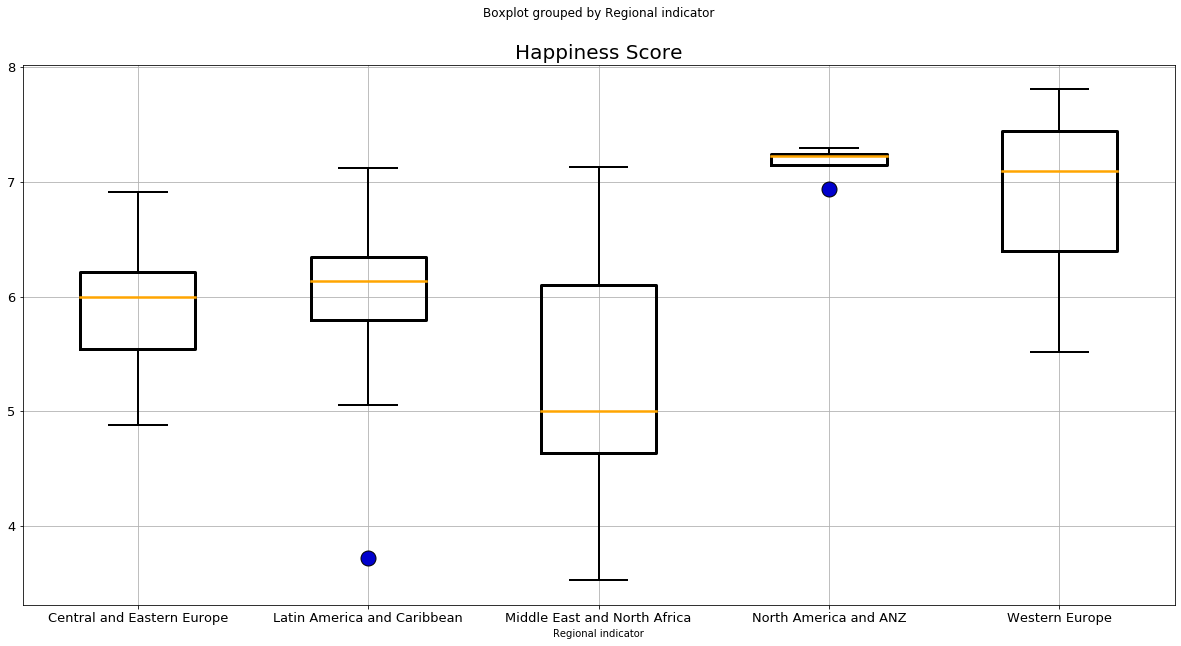

In [62]:
# Create a boxplot to compare means
boxprops = dict(linestyle='-', linewidth=3)
flierprops = dict(marker='o', markerfacecolor='mediumblue', markersize=15,
                  linestyle='none')
medianprops = dict(linestyle='-', linewidth=2.5)
whiskerprops=dict(linestyle='-', linewidth=2)
capprops=dict(linestyle='-', linewidth=2)
color=dict(boxes='black', whiskers='black', medians='orange', caps='black')
region_happinness = region_df_2020.boxplot("Happiness Score", by="Regional indicator", figsize=(20, 10), fontsize=13,
                                             boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, whiskerprops=whiskerprops,
                                            capprops=capprops, color=color)
region_happinness.set_title('Happiness Score', fontsize=20)
plt.savefig("Images/happiness_score_by_region.png");

### ANOVA

In [63]:
# Extract individual groups - GDP Score
group1 = region_df_2020[region_df_2020['Regional indicator'] == 'Western Europe']["GDP per capita"]
group2 = region_df_2020[region_df_2020['Regional indicator'] == 'Latin America and Caribbean']["GDP per capita"]
group3 = region_df_2020[region_df_2020['Regional indicator'] == 'Central and Eastern Europe']["GDP per capita"]
group4 = region_df_2020[region_df_2020['Regional indicator'] == 'Middle East and North Africa']["GDP per capita"]
group5 = region_df_2020[region_df_2020['Regional indicator'] == 'North America and ANZ']["GDP per capita"]

In [64]:
stats.f_oneway(group1, group2, group3,group4, group5)

F_onewayResult(statistic=16.162613217293092, pvalue=1.379088612056574e-09)

### Posthocs

In [65]:
#Dependencies
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp

In [66]:
region_df_2020.columns

Index(['Country name', 'Regional indicator', 'Happiness Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity'],
      dtype='object')

In [67]:
# Posthocs Happinness 
region_df_2020.columns=['Country', 'Region', 'Happiness', 'GDP', 'SSupport',
       'Health', 'Freedom', 'Generosity']
lm = sfa.ols('Happiness ~ Region',data=region_df_2020).fit()
anova = sa.stats.anova_lm(lm)
print(anova)
sp.posthoc_ttest(region_df_2020, val_col='Happiness', group_col='Region', p_adjust='holm')

            df     sum_sq   mean_sq         F        PR(>F)
Region     4.0  32.062949  8.015737  15.76341  2.095752e-09
Residual  75.0  38.137705  0.508503       NaN           NaN


,Western Europe,North America and ANZ,Middle East and North Africa,Latin America and Caribbean,Central and Eastern Europe
Western Europe,1.000000,0.879772,0.000004,0.000579,0.000119
North America and ANZ,0.879772,1.000000,0.006432,0.008899,0.000892
Middle East and North Africa,0.000004,0.006432,1.000000,0.031610,0.063958
Latin America and Caribbean,0.000579,0.008899,0.031610,1.000000,0.879772
Central and Eastern Europe,0.000119,0.000892,0.063958,0.879772,1.000000


In [68]:
# Posthocs GDP
region_df_2020.columns=['Country', 'Region', 'Happiness', 'GDP', 'SSupport',
       'Health', 'Freedom', 'Generosity']
lm = sfa.ols('Happiness ~ Region',data=region_df_2020).fit()
anova = sa.stats.anova_lm(lm)
print(anova)
sp.posthoc_ttest(region_df_2020, val_col='GDP', group_col='Region', p_adjust='holm')

            df     sum_sq   mean_sq         F        PR(>F)
Region     4.0  32.062949  8.015737  15.76341  2.095752e-09
Residual  75.0  38.137705  0.508503       NaN           NaN


,Western Europe,North America and ANZ,Middle East and North Africa,Latin America and Caribbean,Central and Eastern Europe
Western Europe,1.000000e+00,0.893899,0.000493,1.209842e-09,0.000003
North America and ANZ,8.938988e-01,1.000000,0.196982,3.061168e-03,0.010502
Middle East and North Africa,4.926764e-04,0.196982,1.000000,3.663458e-01,0.584129
Latin America and Caribbean,1.209842e-09,0.003061,0.366346,1.000000e+00,0.005055
Central and Eastern Europe,2.954894e-06,0.010502,0.584129,5.055143e-03,1.000000


In [69]:
# What is the correlation level between the variables and the happiness rank?
def happiness(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values, y_values, c="royalblue", edgecolor="black")
    plt.plot(x_values, regress_values,"springgreen")
    plt.xlabel("Happiness Score")
    plt.ylabel(y_values.name)
    plt.show()
    print(line_eq)
    print(f"The r-value is: {rvalue}")

In [ ]:
region_df_2020.columns

In [ ]:
happiness(na_df["Happiness Score"], na_df["GDP per capita"])